# Welcome to the GEP Generator

This jupyter based interface has been designed to support scenario runs for the Global Electrification Platform. 

The interface is built upon a modified version of [OnSSET](http://www.onsset.org/) developed by KTH dESA to provide an easy and quick way to generate electrification investment scenarios compatible with GEP data guidelines and protocols. 

Follow the steps below to generate custom electrification investment outlooks for your country of interest.

#### Start by importing the code 

In [5]:
from gep_onsset import *
from IPython.display import display, Markdown, HTML
%matplotlib inline

2019-06-05 10:10:33,081		Loaded backend module://ipykernel.pylab.backend_inline version unknown.


# 1. Country selection

Before we proceed, please define the directory your input files are located at. Sample file shall be located at .\ gep-onsset\test_data. 


In [10]:
# Update the directory in the ""
os.chdir(r"C:\GitHub\gep-onsset\test_data")

Now fill in the name of the country you wish to run an analysis for. Make sure the name of the country matches with the name of the input csv file in diroctory specified above (e.g. Malawi == Malawi.csv). 

In [11]:
country = 'Malawi'   ### Simply write the name of the selected country within the brackets

coordinate_units = 1000  # 1000 if coordinates are in m, 1 if coordinates are in km
discount_rate = 0.08 # E.g. 0.08 means a discount rate of 8%

onsseter = SettlementProcessor('{x}.csv'.format(x = country))

# 2. Modelling period and target electrification rate

Next, define the modelling period and the electrification rate to be achieved by the end of the analysis. Further down you will also define an intermediate year and target (in the ***Levers*** section).

In [12]:
start_year = 2018
end_year = 2030
electrification_rate_target = 1 # E.g. 1 for 100% electrification rate or 0.80 for 80% electrification rate 

# 3. Levers

Next, define the values of the levers. These are the 6 levers that are available on the GEP Explorer. Contrary to the GEP Explorer where each lever has two or three pre-defined values, here they can take any value.

#### Lever 1: Population growth

For the first lever first, enter the expected population in the country by the end year of the analysis (e.g. 2030). The default values in the GEP Explorer are based on the medium growth variant and high growth variant of the UN Population Database, found <a href="https://population.un.org/wpp/" target="_blank">here</a>.

In [13]:
end_year_pop = 26858618

#### Lever 2: Electricity demand target
For the second lever, enter the target tier (level of electricity access) for urban and rural households respectively. This can take a value between **1** (lowest level of electricity access) and **5** (highest level of electricity access) as in ESMAPs Multi-Tier Framework for Measuring Electricity Access (found <a href="https://www.esmap.org/node/55526" target="_blank">here</a>). Alternatively, enter **6** to use a distribution of the tiers across the country based on poverty levels and GDP according to the methodology found here *link*.   

In [14]:
urban_target_tier = 4
rural_target_tier = 1

#### Lever 3: Intermediate electrification rate target
For the third lever, enter the intermediate target year and target electrification rate for that year.

In [15]:
intermediate_year = 2025
intermediate_electrification_target = 0.63 # E.g. for a target electrification rate of 75%, enter 0.75

#### Lever 4: Grid generating cost of electricity
This lever examines different average costs of generating electricity by the power-plants connected to the national grid. This cost is one of the factors that affect the LCoE of connecting to the grid (together with extension of the grid lines etc.), and may affect the split between grid- and off-grid technologies.

In [16]:
grid_generation_cost = 0.046622           ### This is the grid cost electricity USD/kWh as expected in the end year of the analysis

#### Lever 5: PV system cost adjustment
This lever reflects the role of PV system costs on electrification results. All PV based systems will be adjusted by a factor to simulate a higher or lower cost of PV systems (compared to the baseline values entered below). A value lower than 1 means lower investment costs for PV systems compared to baseline, and a value larger than 1 means higher investment cost for PV systems compared to baseline. E.g. ***0.75*** would mean a cost that is 25% lower compared to baseline costs.

In [17]:
pv_adjustment_factor = 1

#### Lever 6: Prioritization algorithm
This lever reflects the prioritization approach in order to achieve the electrification rate specified (in Lever 3) in intermediate target year of the analysis. There are currently two options available:

**Baseline**: Prioritizes grid densification first (ramp up in already electrified clusters) then selection based on lowest invetsment cost per capita. Grid densification is limited by a grid capacity cap per year and a number of sensible grid connections per year.

**Intensification**: Same as above, plus automatic grid intensification to all clusters within a predefined buffer of X km. (Default value for X is 2km)

In [18]:
prioritization = 2                        # Select 1 or 2. 1 = baseline, 2 = intensification

auto_intensification = 2                  # Buffer distance (km) for automatic intensification if choosing prioritization 1
annual_new_grid_connections_limit = 109 # This is the maximum amount of new households that can be connected to the grid in one year (thousands)
annual_grid_cap_gen_limit = 100       # This is the maximum generation capacity that can be added to the grid in one year (MW)

# 4. Enter country specific data

In addition to the levers above the user can customize a large number of variables describing the social - economic - technological environment in the selected country. 

**Note!** Most input values shall represent future estimates for the variable, i.e. they describe and **NOT** current values.

### a. Demographics and Social components

In [19]:
pop_start_year = 18620000       ### Write the population in the base year (e.g. 2018) 

urban_ratio_start_year = 0.17   ### Write the urban population population ratio in the base year (e.g. 2018)
urban_ratio_end_year = 0.20     ### Write the urban population population ratio in the end year (e.g. 2030)

num_people_per_hh_urban = 4.3     ### Write the number of people per household expected in the end year (e.g. 2030)
num_people_per_hh_rural = 4.5   ### Write the number of people per household expected in the end year (e.g. 2030)

elec_ratio_start_year = 0.11   ### Write the electrification rate in the base year (e.g. 2018)
urban_elec_ratio = 0.492        ### Write urban electrification rate in the base year (e.g. 2018)
rural_elec_ratio = 0.032         ### Write rural electrification rate in the base year (e.g. 2018)

### b. Technology specifications & costs

The cell below contains all the information that is used to calculate the levelized costs for all the technologies, including grid. These default values should be updated to reflect the most accurate values in the country. There are currently 7 potential technologies to include in the model:
* Grid
* PV Mini-grid
* Wind Mini-grid
* Hydro Mini-grid
* Diesel Mini-grid
* PV Stand-alone systems
* Diesel Stand-alone systems

First, decide whether to include diesel technologies or not:

In [20]:
diesel_techs = 0                      ### 0 = diesel NOT included, 1 = diesel included 

In [21]:
grid_power_plants_capital_cost = 2000 ### The cost in USD/kW to for capacity upgrades of the grid
grid_losses = 0.1                     ### The fraction of electricity lost in transmission and distribution (percentage) 
base_to_peak = 0.6                    ### The ratio of base grid demand to peak demand (percentage) 
existing_grid_cost_ratio = 0.1        ### The additional cost per round of electrification (percentage) 

In [22]:
diesel_price = 0.5                   ### This is the diesel price in USD/liter as expected in the end year of the analysis.

In [23]:
sa_diesel_capital_cost = 938          ### Stand-alone Diesel capital cost (USD/kW) as expected in the years of the analysis
mg_diesel_capital_cost = 721          ### Mini-grid Diesel capital cost (USD/kW) as expected in the years of the analysis
mg_pv_capital_cost = 2950             ### Mini-grid PV capital cost (USD/kW) as expected in the years of the analysis
mg_wind_capital_cost = 3750           ### Mini-grid Wind capital cost (USD/kW) as expected in the years of the analysis
mg_hydro_capital_cost = 3000          ### Mini-grid Hydro capital cost (USD/kW) as expected in the years of the analysis

In [24]:
sa_pv_capital_cost_1 = 9620          ### Stand-alone PV capital cost (USD/kW) for household systems under 20 W
sa_pv_capital_cost_2 = 8780          ### Stand-alone PV capital cost (USD/kW) for household systems between 21-50 W
sa_pv_capital_cost_3 = 6380           ### Stand-alone PV capital cost (USD/kW) for household systems between 51-100 W
sa_pv_capital_cost_4 = 4470           ### Stand-alone PV capital cost (USD/kW) for household systems between 101-1000 W
sa_pv_capital_cost_5 = 6950           ### Stand-alone PV capital cost (USD/kW) for household systems over 1 kW

The cells below contain additional technology specifications

In [25]:
# Transmission and distribution costs
mv_line_cost = 7000
lv_line_cost=4250
mv_line_capacity=50
lv_line_capacity=10
lv_line_max_length=30
hv_line_cost=53000
mv_line_max_length=50
hv_lv_transformer_cost=25000
mv_increase_rate=0.1
max_mv_line_dist = 50


# Centralized grid costs
grid_calc = Technology(om_of_td_lines=0.1,
                        distribution_losses=grid_losses,
                        connection_cost_per_hh=150,
                        base_to_peak_load_ratio=base_to_peak,
                        capacity_factor=1,
                        tech_life=30,
                        grid_capacity_investment=grid_power_plants_capital_cost,
                        grid_price=grid_generation_cost)

# Mini-grid hydro costs
mg_hydro_calc = Technology(om_of_td_lines=0.03,
                            distribution_losses=0.05,
                            connection_cost_per_hh=100,
                            base_to_peak_load_ratio=0.85,
                            capacity_factor=0.5,
                            tech_life=30,
                            capital_cost=mg_hydro_capital_cost,
                            om_costs=0.02,
                            )

# Mini-grid wind costs
mg_wind_calc = Technology(om_of_td_lines=0.03,
                            distribution_losses=0.05,
                            connection_cost_per_hh=100,
                            base_to_peak_load_ratio=0.85,
                            capital_cost=mg_wind_capital_cost,
                            om_costs=0.02,
                            tech_life=20,
                            )

# Mini-grid PV costs
mg_pv_calc = Technology(om_of_td_lines=0.03,
                        distribution_losses=0.05,
                        connection_cost_per_hh=100,
                        base_to_peak_load_ratio=0.85,
                        tech_life=20,
                        om_costs=0.02,
                        capital_cost=mg_pv_capital_cost * pv_adjustment_factor                        
                       )

# Stand-alone PV costs
sa_pv_calc = Technology(base_to_peak_load_ratio=0.9,
                        tech_life=15,
                        om_costs=0.02,
                        capital_cost={0.020: sa_pv_capital_cost_1 * pv_adjustment_factor, 
                                      0.050: sa_pv_capital_cost_2 * pv_adjustment_factor, 
                                      0.100: sa_pv_capital_cost_3 * pv_adjustment_factor, 
                                      1: sa_pv_capital_cost_4 * pv_adjustment_factor, 
                                      5: sa_pv_capital_cost_5 * pv_adjustment_factor},
                        standalone=True
                        )

# Mini-grid diesel costs
mg_diesel_calc = Technology(om_of_td_lines=0.03,
                            distribution_losses=0.05,
                            connection_cost_per_hh=100,
                            base_to_peak_load_ratio=0.85,
                            capacity_factor=0.7,
                            tech_life=15,
                            om_costs=0.1,
                            efficiency=0.33,
                            capital_cost=mg_diesel_capital_cost,
                            diesel_price=diesel_price,
                            diesel_truck_consumption=33.7,
                            diesel_truck_volume=15000,
                            )

# Stand-alone diesel costs
sa_diesel_calc = Technology(base_to_peak_load_ratio=0.9,
                            capacity_factor=0.7,
                            tech_life=10,
                            om_costs=0.1,
                            capital_cost=sa_diesel_capital_cost,
                            diesel_price=diesel_price,
                            standalone=True,
                            efficiency=0.28,
                            diesel_truck_consumption=14,
                            diesel_truck_volume=300)

# 5. GIS data import and processing

OnSSET is a GIS based tool and its proper function depends heavily on the diligent preparation and calibration of the necessary geospatial data. Documentation on GIS processing in regards to OnSSET can be found <a href="http://onsset-manual.readthedocs.io/en/latest/data_acquisition.html" target="_blank">here</a>. The following cell reads the CSV-file containing the extracted GIS data for the country chosen in the previous section, and displays a snap-shot of some of the data.

In [26]:
yearsofanalysis = [intermediate_year, end_year]

onsseter.condition_df()
onsseter.grid_penalties()
onsseter.calc_wind_cfs()
onsseter.calibrate_pop_and_urban(pop_start_year, end_year_pop, end_year_pop, urban_ratio_start_year, 
                                 urban_ratio_end_year, start_year, end_year)

eleclimits = {intermediate_year: intermediate_electrification_target, end_year: electrification_rate_target}
time_steps = {intermediate_year: intermediate_year-start_year, end_year: end_year-intermediate_year}

display(Markdown('#### The {c}.csv file has been imported correctly. Here is a preview:'.format(c=country)))
display(onsseter.df[['Country','Pop','NightLights','TravelHours','GHI','WindVel','Hydropower','HydropowerDist']].sample(7))


2019-06-05 10:14:45,678		Ensure that columns that are supposed to be numeric are numeric
2019-06-05 10:14:45,710		Adding column "ElectrificationOrder"
2019-06-05 10:14:45,714		Replace null values with zero
2019-06-05 10:14:45,746		Sort by country, Y and X
2019-06-05 10:14:45,887		Classify road dist
2019-06-05 10:14:48,063		Classify substation dist
2019-06-05 10:14:50,437		Classify land cover
2019-06-05 10:14:52,697		Classify elevation
2019-06-05 10:14:54,914		Classify slope
2019-06-05 10:14:57,213		Combined classification
2019-06-05 10:14:57,301		Grid penalty
2019-06-05 10:15:00,053		Calculate Wind CF
2019-06-05 10:15:07,921		Calibrate current population


Use urban definition from GIS layer <y/n> (n=model calibration):n


2019-06-05 10:15:40,669		Project future population


#### The Malawi.csv file has been imported correctly. Here is a preview:

,Country,Pop,NightLights,TravelHours,GHI,WindVel,Hydropower,HydropowerDist
42332,Malawi,5.23828,0.0,0.28333,2060,4.55849,271,35.84889
191338,Malawi,7405.11456,0.0,1.10000,1921,3.85074,168,6.52289
992,Malawi,13.35700,0.0,1.66667,2050,4.68967,221,42.34463
72108,Malawi,4.96165,0.0,1.31667,2020,4.25187,405,45.00941
190233,Malawi,3.44003,0.0,1.73333,1998,4.11810,375,53.57707
198782,Malawi,12.68228,0.0,1.65000,2078,3.89294,150,27.22015
50198,Malawi,1.84156,0.0,3.13333,1937,4.74612,337,9.44161


In some cases it can be of interest to filter out clusters with very low populations, e.g. to increase computational speed or to remove false positives in the data. Setting the **pop_threshold** variable below larger than 0 will filter out all settlements below that threshold form the analysis.

In [27]:
pop_threshold = 0  # If you wish to remove low density population cells, enter a threshold above 0
onsseter.df = onsseter.df.loc[onsseter.df[SET_POP] > pop_threshold]

#### Calibration of currently electrified settlements

The model calibrates which settlements are likely to be electrified in the start year, to match the national statistical values defined above. A settlement is considered to be electrified if it meets all of the following conditions:
- Has more night-time lights than the defined threshold (this is set to 0 by default)
- Is closer to the existing grid network than the distance limit
- Has more population than the threshold

First, define the threshold limits. Then run the calibration and check if the results seem okay. Else, redefine these thresholds and run again.

In [28]:
min_night_lights = 0    ### 0 Indicates no night light, while any number above refers to the night-lights intensity
min_pop = 50      ### Settlement above which we can assume that it could be electrified

max_service_transformer_distance = 2    ### Distance  in km from the existing grid network below which we can assume a settlement could be electrified
max_mv_line_distance = 2
max_hv_line_distance = 25

In [29]:
Technology.set_default_values(base_year=start_year, start_year=start_year, end_year=end_year, discount_rate=discount_rate)

elec_modelled, urban_internal_elec_ratio, rural_internal_elec_ratio = onsseter.elec_current_and_future(elec_ratio_start_year, 
                                                                                                       urban_elec_ratio, 
                                                                                                       rural_elec_ratio, 
                                                                                                       pop_start_year, 
                                                                                                       start_year,
                                                                                                       min_night_lights=min_night_lights, 
                                                                                                       min_pop=min_pop, 
                                                                                                       max_transformer_dist=max_service_transformer_distance, 
                                                                                                       max_mv_dist=max_mv_line_distance, 
                                                                                                       max_hv_dist=max_hv_line_distance) 

onsseter.grid_reach_estimate(start_year, gridspeed=9999)

2019-06-05 10:16:11,194		Calibrate current electrification


We have identified the existence of transformers or MV lines as input data; therefore we proceed using those for the calibration
The modelled electrification rate achieved is 0.11.Urban elec. rate is 0.51 and Rural elec. rate is 0.03. 
If this is not acceptable please revise this part of the algorithm


The figure below show the results of the calibration. Settlements in **blue** are considered to be (at least partly) electrified already in the start year of the analysis, while settlements in **yellow** are yet to be electrified. Re-running the calibration step with different intial values may change the map below.

<Figure size 2160x2160 with 0 Axes>

2019-06-05 10:17:22,790		update_title_pos
2019-06-05 10:17:22,871		update_title_pos
2019-06-05 10:17:22,956		update_title_pos
2019-06-05 10:17:22,987		update_title_pos
2019-06-05 10:17:23,004		update_title_pos


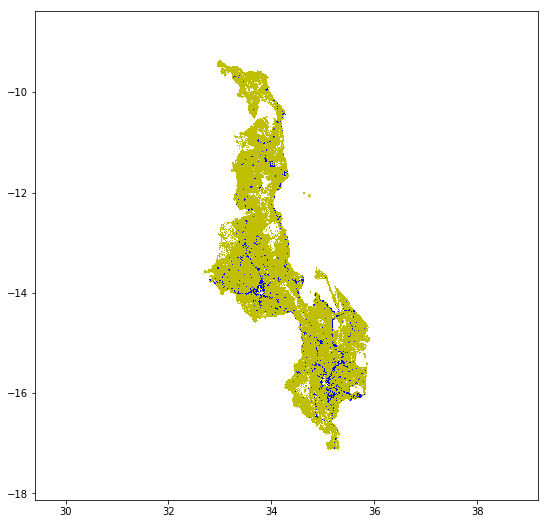

<Figure size 2160x2160 with 0 Axes>

In [32]:
from matplotlib import pyplot as plt
colors = ['#73B2FF','#EDD100','#EDA800','#1F6600','#98E600','#70A800','#1FA800']
plt.figure(figsize=(9,9))
plt.plot(onsseter.df.loc[onsseter.df[SET_ELEC_CURRENT]==0, SET_X_DEG], onsseter.df.loc[onsseter.df[SET_ELEC_CURRENT]==0, SET_Y_DEG], 'y,')
plt.plot(onsseter.df.loc[onsseter.df[SET_ELEC_CURRENT]==1, SET_X_DEG], onsseter.df.loc[onsseter.df[SET_ELEC_CURRENT]==1, SET_Y_DEG], 'b,')
if onsseter.df[SET_X_DEG].max() - onsseter.df[SET_X_DEG].min() > onsseter.df[SET_Y_DEG].max() - onsseter.df[SET_Y_DEG].min():
    plt.xlim(onsseter.df[SET_X_DEG].min() - 1, onsseter.df[SET_X_DEG].max() + 1)
    plt.ylim((onsseter.df[SET_Y_DEG].min()+onsseter.df[SET_Y_DEG].max())/2 - 0.5*abs(onsseter.df[SET_X_DEG].max() - onsseter.df[SET_X_DEG].min()) - 1, (onsseter.df[SET_Y_DEG].min()+onsseter.df[SET_Y_DEG].max())/2 + 0.5*abs(onsseter.df[SET_X_DEG].max() - onsseter.df[SET_X_DEG].min()) + 1)
else:
    plt.xlim((onsseter.df[SET_X_DEG].min()+onsseter.df[SET_X_DEG].max())/2 - 0.5*abs(onsseter.df[SET_Y_DEG].max() - onsseter.df[SET_Y_DEG].min()) - 1, (onsseter.df[SET_X_DEG].min()+onsseter.df[SET_X_DEG].max())/2 + 0.5*abs(onsseter.df[SET_Y_DEG].max() - onsseter.df[SET_Y_DEG].min()) + 1)
    plt.ylim(onsseter.df[SET_Y_DEG].min() -1, onsseter.df[SET_Y_DEG].max() +1)
plt.figure(figsize=(30,30))

# 6. Define the demand

This piece of code defines the target electricity demand in the region/country. Residential electricity demand is defined as kWh/household/year, while all other demands are defined as kWh/capita/year. Note that at the moment, all productive uses demands are set to 0 by default.

In [33]:
# Define the annual household electricity targets to choose from
tier_1 = 38.7  # 38.7 refers to kWh/household/year. 
tier_2 = 219
tier_3 = 803
tier_4 = 2117
tier_5 = 2993

onsseter.prepare_wtf_tier_columns(num_people_per_hh_rural, num_people_per_hh_urban, tier_1, tier_2, tier_3, tier_4, tier_5)

2019-06-05 10:17:29,783		Populate ResidentialDemandTier columns


In [34]:
onsseter.df[SET_EDU_DEMAND] = 0           # Demand for educational facilities (kWh/capita/year)
onsseter.df[SET_HEALTH_DEMAND] = 0        # Demand for health facilities (kWh/capita/year)
onsseter.df[SET_COMMERCIAL_DEMAND] = 0    # Demand for commercial activities (kWh/capita/year)
onsseter.df[SET_AGRI_DEMAND] = 0          # Demand for agricultural activities (kWh/capita/year)
productive_demand = 0 # 1 if productive demand is defined and should be included, else 0

# 7. Start a scenario run, which calculate and compare technology costs for every settlement in the country

Based on the previous calculation this piece of code identifies the LCoE that every off-grid technology can provide, for each single populated settlement of the selected country. The cell then takes all the currently grid-connected points in the country, and looks at the points within a certain distance from them, to see if it is more economical to connect them to the grid, or to use one of the off-grid technologies calculated above. Once more points are connected to the grid, the process is repeated, so that new points close to those points might also be connected. This is repeated until there are no new points to connect to the grid.

In [35]:
onsseter.current_mv_line_dist()

for year in yearsofanalysis:
    end_year_pop = 1
        
    eleclimit = eleclimits[year]
    time_step = time_steps[year]
    grid_cap_gen_limit = time_step * annual_grid_cap_gen_limit
    grid_connect_limit = time_step * annual_new_grid_connections_limit
    
    onsseter.set_scenario_variables(year, num_people_per_hh_rural, num_people_per_hh_urban, time_step,
                                            start_year, urban_elec_ratio, rural_elec_ratio, urban_target_tier, 
                                            rural_target_tier, end_year_pop, productive_demand)

    onsseter.calculate_off_grid_lcoes(mg_hydro_calc, mg_wind_calc, mg_pv_calc, sa_pv_calc, mg_diesel_calc,
                                        sa_diesel_calc, 0, 0, 0, 0, 0, year, start_year, end_year, time_step,
                                     diesel_techs=diesel_techs)

    onsseter.pre_electrification(grid_calc, grid_generation_cost, year, time_step, start_year)

    onsseter.run_elec(grid_calc, max_mv_line_dist, year, start_year, end_year, time_step,
                              grid_cap_gen_limit, grid_connect_limit, auto_intensification, prioritization)

    onsseter.results_columns(mg_hydro_calc, mg_wind_calc, mg_pv_calc, sa_pv_calc, mg_diesel_calc,
                                     sa_diesel_calc, grid_calc, 0, 0, 0, 0, 0, year)

    onsseter.calculate_investments(mg_hydro_calc, mg_wind_calc, mg_pv_calc, sa_pv_calc, mg_diesel_calc,
                                           sa_diesel_calc, grid_calc, 0, 0, 0, 0, 0, year, end_year, time_step)

    onsseter.apply_limitations(eleclimit, year, time_step, prioritization, auto_intensification)

    onsseter.final_decision(mg_hydro_calc, mg_wind_calc, mg_pv_calc, sa_pv_calc, mg_diesel_calc, sa_diesel_calc,
                                    grid_calc, 0, 0, 0, 0, 0, year, end_year, time_step)    

2019-06-05 10:17:40,429		Determine current MV line length
2019-06-05 10:17:40,583		Calculate new connections
2019-06-05 10:17:40,777		Setting electrification demand as per target per year
2019-06-05 10:17:41,570		Calculate minigrid hydro LCOE
2019-06-05 10:17:51,049		58 potential hydropower sites were utilised to maximum capacity
2019-06-05 10:17:51,050		Calculate minigrid PV LCOE
2019-06-05 10:18:26,343		Calculate minigrid wind LCOE
2019-06-05 10:18:31,789		Calculate standalone PV LCOE
2019-06-05 10:19:14,376		Determine minimum technology (off-grid)
2019-06-05 10:19:14,871		Determine minimum tech LCOE
2019-06-05 10:19:15,469		Define the initial electrification status
2019-06-05 10:19:15,911		Electrification algorithm starts running
2019-06-05 10:19:55,704		Initially 1639 electrified
2019-06-05 10:19:57,994		Determine minimum overall
2019-06-05 10:19:58,587		Determine minimum overall LCOE
2019-06-05 10:19:58,684		Add technology codes
2019-06-05 10:19:59,292		Calculate investment cost
2

The electrification rate achieved in 2025 is 63.6 %


2019-06-05 10:20:53,042		Calculate new capacity
2019-06-05 10:20:53,331		Calculate new connections
2019-06-05 10:20:53,693		Setting electrification demand as per target per year
2019-06-05 10:20:54,068		Calculate minigrid hydro LCOE
2019-06-05 10:21:09,447		40 potential hydropower sites were utilised to maximum capacity
2019-06-05 10:21:09,449		Calculate minigrid PV LCOE
2019-06-05 10:22:01,075		Calculate minigrid wind LCOE
2019-06-05 10:22:07,458		Calculate standalone PV LCOE
2019-06-05 10:22:41,682		Determine minimum technology (off-grid)
2019-06-05 10:22:42,147		Determine minimum tech LCOE
2019-06-05 10:22:42,729		Define the initial electrification status
2019-06-05 10:22:43,241		Electrification algorithm starts running
2019-06-05 10:23:12,503		Initially 1639 electrified
2019-06-05 10:23:13,483		Determine minimum overall
2019-06-05 10:23:14,043		Determine minimum overall LCOE
2019-06-05 10:23:14,123		Add technology codes
2019-06-05 10:23:14,639		Calculate investment cost
2019-06-05 

The electrification rate achieved in 2030 is 100.0 %


2019-06-05 10:23:51,397		Calculate new capacity


# 8. Results, Summaries and Visualization
With all the calculations and grid-extensions complete, this block gets the final results on which technology was chosen for each point, how much capacity needs to be installed and what it will cost. Then the summaries, plots and maps are generated.

In [36]:
elements = ["Population", "New_Connections", "Capacity", "Investment"]
techs = ["Grid", "SA_Diesel", "SA_PV", "MG_Diesel", "MG_PV", "MG_Wind", "MG_Hydro"]

sumtechs = []

sumtechs.extend(["Population" + t for t in techs])
sumtechs.extend(["New_Connections" + t for t in techs])
sumtechs.extend(["Capacity" + t for t in techs])
sumtechs.extend(["Investment" + t for t in techs])
summary = pd.Series(index=sumtechs, name=country)
                    
for t in techs:
    summary.loc["Population" + t] = onsseter.df.loc[onsseter.df[SET_MIN_OVERALL + '2030'] == t + '2030', SET_POP + '2030'].sum()
    summary.loc["New_Connections" + t] = onsseter.df.loc[onsseter.df[SET_MIN_OVERALL + '2030'] == t + '2030', SET_NEW_CONNECTIONS + '2030'].sum()
    summary.loc["Capacity" + t] = onsseter.df.loc[onsseter.df[SET_MIN_OVERALL + '2030'] == t + '2030', SET_NEW_CAPACITY + '2030'].sum()/1000
    summary.loc["Investment" + t] = onsseter.df.loc[onsseter.df[SET_MIN_OVERALL + '2030'] == t + '2030', SET_INVESTMENT_COST + '2030'].sum()
    
index = techs + ['Total']
columns = ['Population', 'New connections', 'Capacity (MW)', 'Investments (million USD)']
summary_table = pd.DataFrame(index=index, columns=columns)

summary_table[columns[0]] = summary.iloc[0:7].astype(int).tolist() + [int(summary.iloc[0:7].sum())]
summary_table[columns[1]] = summary.iloc[7:14].astype(int).tolist() + [int(summary.iloc[7:14].sum())]
summary_table[columns[2]] = summary.iloc[14:21].astype(int).tolist() + [int(summary.iloc[14:21].sum())]
summary_table[columns[3]] = [round(x/1e4)/1e2 for x in summary.iloc[21:28].astype(float).tolist()] + [round(summary.iloc[21:28].sum()/1e4)/1e2]

In [37]:
display(Markdown('### Summary \n These are the summarized results for full electrification of the selected country by the final year'))
summary_table

### Summary 
 These are the summarized results for full electrification of the selected country by the final year

,Population,New connections,Capacity (MW),Investments (million USD)
Grid,8522254,1520832,111,301.86
SA_Diesel,0,0,0,0.00
SA_PV,18002845,10368778,50,262.20
MG_Diesel,0,0,0,0.00
MG_PV,333517,333517,98,181.35
MG_Wind,0,0,0,0.00
MG_Hydro,0,0,0,0.00
Total,26858617,12223127,260,745.40


2019-06-05 10:27:48,506		update_title_pos
2019-06-05 10:27:48,546		findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=20.0 to DejaVu Sans ('C:\\Users\\asahl\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000.
2019-06-05 10:27:48,551		update_title_pos
2019-06-05 10:27:48,584		update_title_pos
2019-06-05 10:27:48,614		update_title_pos
2019-06-05 10:27:48,663		update_title_pos
2019-06-05 10:27:48,688		update_title_pos
2019-06-05 10:27:48,718		update_title_pos
2019-06-05 10:27:48,743		update_title_pos
2019-06-05 10:27:48,841		update_title_pos
2019-06-05 10:27:48,861		update_title_pos
2019-06-05 10:27:48,880		update_title_pos
2019-06-05 10:27:48,902		update_title_pos
2019-06-05 10:27:48,958		update_title_pos
2019-06-05 10:27:48,977		update_title_pos
2019-06-05 10:27:49,002		update_title_pos
2019-06-05 10:27:49,024		update_title_pos
2019-06-05 10:27:49,045		updat

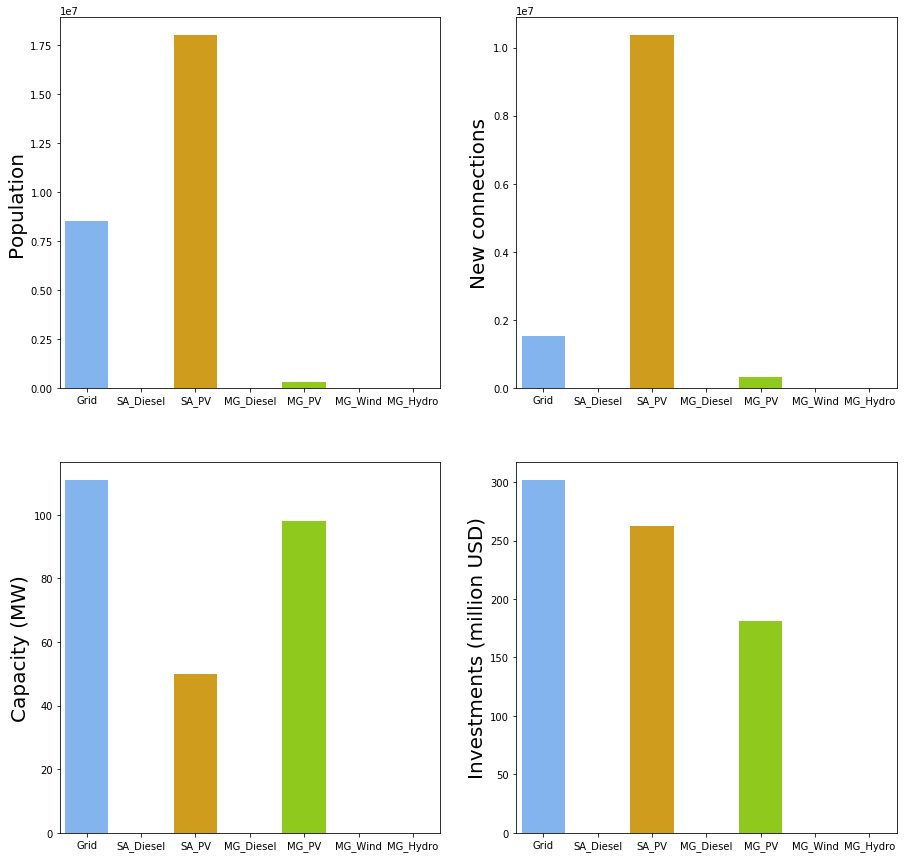

In [38]:
import matplotlib.pylab as plt
import seaborn as sns

colors = ['#73B2FF','#EDD100','#EDA800','#1F6600','#98E600','#70A800','#1FA800']
techs_colors = dict(zip(techs, colors))

summary_plot=summary_table.drop(labels='Total',axis=0)
fig_size = [15, 15]
font_size = 10
plt.rcParams["figure.figsize"] = fig_size
f, axarr = plt.subplots(2, 2)
fig_size = [15, 15]
font_size = 10
plt.rcParams["figure.figsize"] = fig_size

sns.barplot(x=summary_plot.index.tolist(), y=columns[0], data=summary_plot, ax=axarr[0, 0], palette=colors)
axarr[0, 0].set_ylabel(columns[0], fontsize=2*font_size)
axarr[0, 0].tick_params(labelsize=font_size)
sns.barplot(x=summary_plot.index.tolist(), y=columns[1], data=summary_plot, ax=axarr[0, 1], palette=colors)
axarr[0, 1].set_ylabel(columns[1], fontsize=2*font_size)
axarr[0, 1].tick_params(labelsize=font_size)
sns.barplot(x=summary_plot.index.tolist(), y=columns[2], data=summary_plot, ax=axarr[1, 0], palette=colors)
axarr[1, 0].set_ylabel(columns[2], fontsize=2*font_size)
axarr[1, 0].tick_params(labelsize=font_size)
sns.barplot(x=summary_plot.index.tolist(), y=columns[3], data=summary_plot, ax=axarr[1, 1], palette=colors)
axarr[1, 1].set_ylabel(columns[3], fontsize=2*font_size)
axarr[1, 1].tick_params(labelsize=font_size)

<Figure size 2160x2160 with 0 Axes>

2019-06-05 10:27:49,349		update_title_pos
2019-06-05 10:27:49,457		update_title_pos
2019-06-05 10:27:49,537		update_title_pos
2019-06-05 10:27:49,587		update_title_pos
2019-06-05 10:27:49,615		update_title_pos


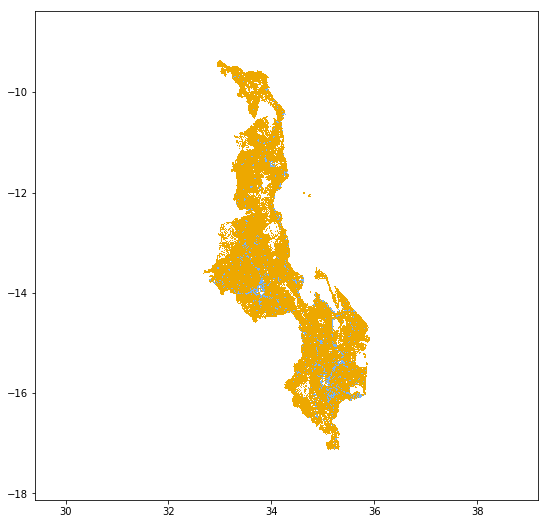

<Figure size 2160x2160 with 0 Axes>

In [39]:
from matplotlib import pyplot as plt
colors = ['#73B2FF','#EDD100','#EDA800','#1F6600','#98E600','#70A800','#1FA800']
plt.figure(figsize=(9,9))
plt.plot(onsseter.df.loc[onsseter.df['FinalElecCode2030']==3, SET_X_DEG], onsseter.df.loc[onsseter.df['FinalElecCode2030']==3, SET_Y_DEG], color='#EDA800', marker=',', linestyle='none')
plt.plot(onsseter.df.loc[onsseter.df['FinalElecCode2030']==2, SET_X_DEG], onsseter.df.loc[onsseter.df['FinalElecCode2030']==2, SET_Y_DEG], color='#EDD100', marker=',', linestyle='none')
plt.plot(onsseter.df.loc[onsseter.df['FinalElecCode2030']==4, SET_X_DEG], onsseter.df.loc[onsseter.df['FinalElecCode2030']==4, SET_Y_DEG], color='#1F6600', marker=',', linestyle='none')
plt.plot(onsseter.df.loc[onsseter.df['FinalElecCode2030']==5, SET_X_DEG], onsseter.df.loc[onsseter.df['FinalElecCode2030']==5, SET_Y_DEG], color='#98E600', marker=',', linestyle='none')
plt.plot(onsseter.df.loc[onsseter.df['FinalElecCode2030']==6, SET_X_DEG], onsseter.df.loc[onsseter.df['FinalElecCode2030']==6, SET_Y_DEG], color='#70A800', marker=',', linestyle='none')
plt.plot(onsseter.df.loc[onsseter.df['FinalElecCode2030']==7, SET_X_DEG], onsseter.df.loc[onsseter.df['FinalElecCode2030']==7, SET_Y_DEG], color='#1FA800', marker=',', linestyle='none')
plt.plot(onsseter.df.loc[onsseter.df['FinalElecCode2030']==1, SET_X_DEG], onsseter.df.loc[onsseter.df['FinalElecCode2030']==1, SET_Y_DEG], color='#73B2FF', marker=',', linestyle='none')
if onsseter.df[SET_X_DEG].max() - onsseter.df[SET_X_DEG].min() > onsseter.df[SET_Y_DEG].max() - onsseter.df[SET_Y_DEG].min():
    plt.xlim(onsseter.df[SET_X_DEG].min() - 1, onsseter.df[SET_X_DEG].max() + 1)
    plt.ylim((onsseter.df[SET_Y_DEG].min()+onsseter.df[SET_Y_DEG].max())/2 - 0.5*abs(onsseter.df[SET_X_DEG].max() - onsseter.df[SET_X_DEG].min()) - 1, (onsseter.df[SET_Y_DEG].min()+onsseter.df[SET_Y_DEG].max())/2 + 0.5*abs(onsseter.df[SET_X_DEG].max() - onsseter.df[SET_X_DEG].min()) + 1)
else:
    plt.xlim((onsseter.df[SET_X_DEG].min()+onsseter.df[SET_X_DEG].max())/2 - 0.5*abs(onsseter.df[SET_Y_DEG].max() - onsseter.df[SET_Y_DEG].min()) - 1, (onsseter.df[SET_X_DEG].min()+onsseter.df[SET_X_DEG].max())/2 + 0.5*abs(onsseter.df[SET_Y_DEG].max() - onsseter.df[SET_Y_DEG].min()) + 1)
    plt.ylim(onsseter.df[SET_Y_DEG].min() -1, onsseter.df[SET_Y_DEG].max() +1)
plt.figure(figsize=(30,30))

## Exporting results

This code generates two csv files:
 - one containing all the results for the scenario created
 - one containing the summary for the scenario created

Before we proceed, please define the directory your output files should be located at and write the scenario_name. Sample file shall be located at .\ gep-onsset\sample_output. 

**Note that if you do not change the scenario name, the previous output files will be overwritten

In [42]:
# Update the output directory in the ""
os.chdir(r"C:\GitHub\gep-onsset\sample_output")
scenario_name = 'Scenario_1'

In [44]:
# Returning the result as a csv file
onsseter.df.to_csv(r"Results_{s}.csv".format(s=scenario_name), index=False)

# Returning the summary as a csv file
summary_table.to_csv(r"Summary_{s}.csv".format(s=scenario_name), index=True)